In [ ]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('/content/teste_indicium_precificacao.csv')

# Verificar as primeiras linhas e a estrutura
df.head(), df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

(     id                                              nome  host_id  \
 0  2595                             Skylit Midtown Castle     2845   
 1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
 2  3831                   Cozy Entire Floor of Brownstone     4869   
 3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
 4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
 
      host_name bairro_group        bairro  latitude  longitude  \
 0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
 1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
 2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
 3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
 4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   
 
          room_type  price  minimo_noites  numero_de_reviews ultima_review  \
 0  Entire home/apt    225              1                 45    2019-05-21   
 1     Priva

In [ ]:
# Estatísticas descritivas para as variáveis numéricas
df.describe()


,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Imputação para valores numéricos
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(df['reviews_por_mes'].median())

# Imputação para valores categóricos
df['nome'] = df['nome'].fillna(df['nome'].mode()[0])
df['host_name'] = df['host_name'].fillna(df['host_name'].mode()[0])
df['ultima_review'] = df['ultima_review'].fillna(df['ultima_review'].mode()[0])

# Verificar se ainda há valores ausentes
df.isnull().sum()


,0
id,0
nome,0
host_id,0
host_name,0
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# Verificar os tipos de dados e garantir que estejam corretos
df.dtypes



,0
id,int64
nome,object
host_id,int64
host_name,object
bairro_group,object
bairro,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [ ]:
#corrigir a parte do código onde usa 'tipo_imovel'
X = df[['numero_de_reviews', 'bairro', 'room_type', 'price', 'reviews_por_mes']]

# Codificar variáveis categóricas, incluindo a coluna 'room_type'
X = pd.get_dummies(X, drop_first=True)  # drop_first=True para evitar colinearidade
# Verificar os valores únicos na coluna 'room_type'
print(df['room_type'].value_counts())



room_type
Entire home/apt    25409
Private room       22325
Shared room         1160
Name: count, dtype: int64


In [ ]:
# Codificar variáveis categóricas
X = df[['numero_de_reviews', 'bairro', 'room_type', 'reviews_por_mes']]

# One-Hot Encoding para as variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Visualizar o resultado
print(X.head())


   numero_de_reviews  reviews_por_mes  bairro_Arden Heights  bairro_Arrochar  \
0                 45         0.380000                 False            False   
1                  0         1.373251                 False            False   
2                270         4.640000                 False            False   
3                  9         0.100000                 False            False   
4                 74         0.590000                 False            False   

   bairro_Arverne  bairro_Astoria  bairro_Bath Beach  \
0           False           False              False   
1           False           False              False   
2           False           False              False   
3           False           False              False   
4           False           False              False   

   bairro_Battery Park City  bairro_Bay Ridge  bairro_Bay Terrace  ...  \
0                     False             False               False  ...   
1                     False       

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializar o scaler
scaler = StandardScaler()

# Normalizar as variáveis numéricas
X[['reviews_por_mes']] = scaler.fit_transform(X[['reviews_por_mes']])

# Verificar se as variáveis foram normalizadas
print(X.head())


   numero_de_reviews  reviews_por_mes  bairro_Arden Heights  bairro_Arrochar  \
0                 45    -6.631554e-01                 False            False   
1                  0     1.482506e-16                 False            False   
2                270     2.181081e+00                 False            False   
3                  9    -8.501006e-01                 False            False   
4                 74    -5.229466e-01                 False            False   

   bairro_Arverne  bairro_Astoria  bairro_Bath Beach  \
0           False           False              False   
1           False           False              False   
2           False           False              False   
3           False           False              False   
4           False           False              False   

   bairro_Battery Park City  bairro_Bay Ridge  bairro_Bay Terrace  ...  \
0                     False             False               False  ...   
1                     False       

In [ ]:
# Estatísticas descritivas da variável 'price'
preco_descricao = df['price'].describe()
print(preco_descricao)


count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


 **Resultados das estatísticas descritivas para a coluna price:**


count: 48.894 registros no total, ou seja, há 48.894 dados de preços de aluguéis no dataset.
mean (média): O preço médio de aluguel é de 152,72.
std (desvio padrão): O desvio padrão é 240,16, o que indica uma grande variação nos preços dos aluguéis. Ou seja, os preços podem ser muito mais altos ou muito mais baixos que a média.
min (mínimo): O menor preço registrado é 0, o que sugere que há registros com preço igual a zero, o que pode ser um dado inválido ou a ausência de preços para determinados imóveis.
25% (1º quartil): 25% dos aluguéis têm preços abaixo de 69.
50% (mediana): A mediana dos preços de aluguel é 106, o que significa que metade dos aluguéis custa menos que isso e metade custa mais.
75% (3º quartil): 75% dos aluguéis têm preços abaixo de 175.
max (máximo): O preço máximo registrado é 10.000, indicando que existem aluguéis de alto valor no dataset.
Interpretação geral:
A média dos preços de aluguel está em torno de 152,72, mas o desvio padrão alto de 240,16 indica uma grande dispersão nos valores. Isso significa que enquanto alguns aluguéis são relativamente baratos (próximos de 69), outros podem ser muito caros, chegando até 10.000.
O valor mínimo de 0 pode indicar dados inconsistentes ou inválidos, o que deve ser verificado e tratado.
A mediana de 106 sugere que a maioria dos aluguéis está na faixa mais baixa de preços, com um preço médio um pouco maior, devido à presença de alguns valores extremos.
Essa distribuição de preços pode ser importante para entender o mercado de aluguéis temporários e ajudar na precificação futura de imóveis.

In [ ]:
# Verificar quais registros possuem preço igual a 0
df[df['price'] == 0]



,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365


In [ ]:
# Substituindo preço 0 por valor específico dependendo do tipo de imóvel
df.loc[(df['price'] == 0) & (df['room_type'] == 'Entire home/apt'), 'price'] = 100  # Preço para Entire home/apt
df.loc[(df['price'] == 0) & (df['room_type'] == 'Private room'), 'price'] = 50  # Preço para Private room
df.loc[(df['price'] == 0) & (df['room_type'] == 'Shared room'), 'price'] = 30  # Preço para Shared room



In [ ]:
import numpy as np

# Percentis específicos
percentis = np.percentile(df['price'], [25, 50, 75])
print(f"Percentis: 25%={percentis[0]}, 50% (mediana)={percentis[1]}, 75%={percentis[2]}")


Percentis: 25%=69.0, 50% (mediana)=106.0, 75%=175.0


**Explicação dos Percentis**


**Percentil 25% (Q1) - 69,0 :**

Interpretação : 25% dos aluguéis têm um preço menor ou igual a 69 . Isso significa que, se você ordenar os preços de aluguel do mais barato ao mais caro, 25% dos imóveis estão com preços abaixo de 69, ou seja, 1 em cada 4 imóveis tem um preço de aluguel abaixo deste valor.

O que isso diz sobre a distribuição : Este é o primeiro quartil , e geralmente, ele representa a "faixa inferior" dos dados. Os preços abaixo de 69 estão concentrados em imóveis mais baratos.

**Percentil 50% (Mediana) - 106,0 :**

Interpretação : A mediana é o valor que divide o conjunto de dados ao meio. Então, 50% dos imóveis têm preço abaixo de 106 , e 50% têm preço acima de 106 .

O que isso diz sobre a distribuição : A mediana nos dá uma ideia do preço "típico" do imóvel. Como o preço de aluguel de imóveis pode ter valores discrepantes (preços muito altos ou muito baixos), a mediana é útil para representar o valor central da distribuição, sem ser afetado por valores extremos.

**Percentil 75% (Q3) - 175,0 :**

Interpretação : 75% dos imóveis têm preço menor ou igual a 175 , e apenas 25% dos imóveis têm preço superior a 175.

O que isso diz sobre a distribuição : Este é o terceiro quartil e nos dá uma ideia dos preços mais altos. A maior parte dos imóveis (75%) tem preço abaixo de 175, então valores acima de 175 estão localizados na "faixa superior" da distribuição.

Resumo da Distribuição
Primeiro Quartil (25%) : Os imóveis com preço de aluguel abaixo de 69 são mais baratos (25% do total).
Mediana (50%) : O preço "típico" dos imóveis de aluguel é 106, ou seja, a maioria dos imóveis está na faixa de preços até 106.
Terceiro Quartil (75%) : Apenas 25% dos imóveis têm preço superior a 175, indicando que a maior parte dos imóveis está na faixa de preço de 69 a 175.
O que isso nos diz?
A distribuição dos preços de aluguel parece ser assimétrica à direita (positivamente invejada) , o que é comum em mercados de aluguel de imóveis. Isso significa que há alguns imóveis com preços muito mais altos (os outliers) que "puxam" a média para cima, mas a maior parte dos imóveis tem preços abaixo da média , concentrados entre 69 e 175. Ou seja, a maioria dos imóveis é mais barato, mas há uma pequena quantidade de imóveis muito caros.



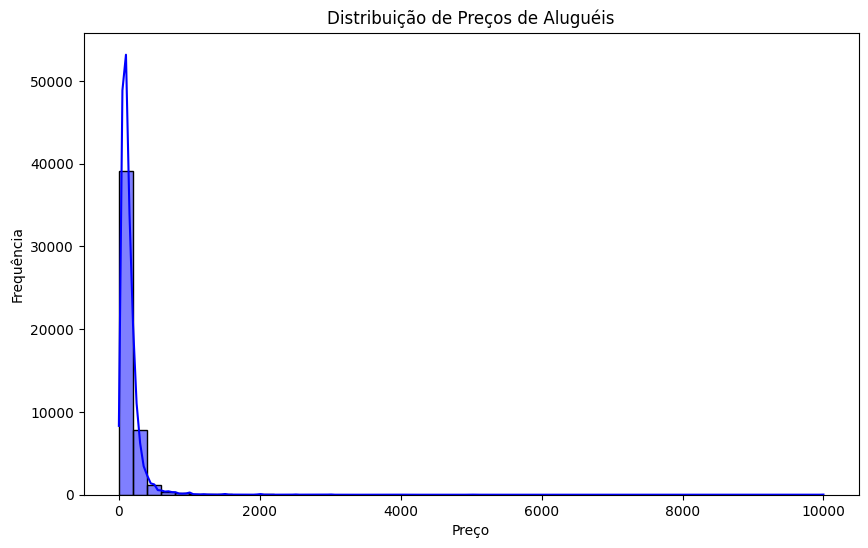

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar a distribuição dos preços com gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue', bins=50)
plt.title('Distribuição de Preços de Aluguéis')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()


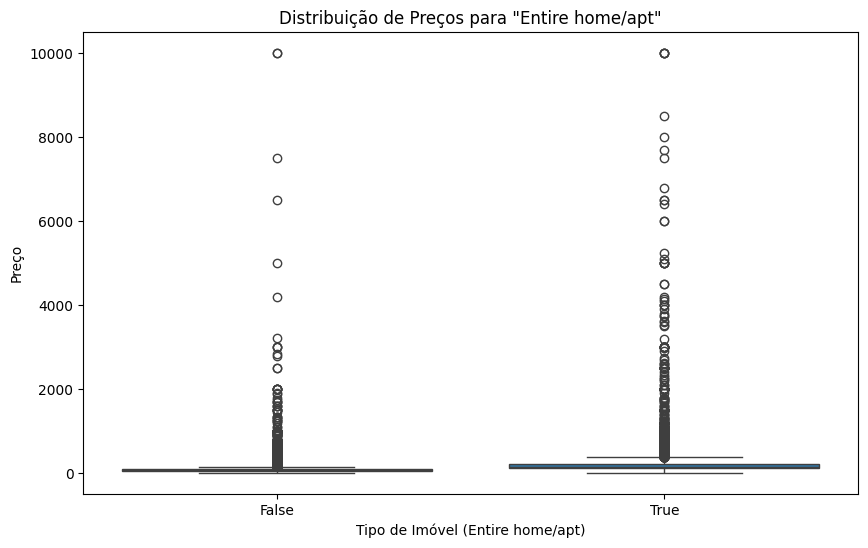

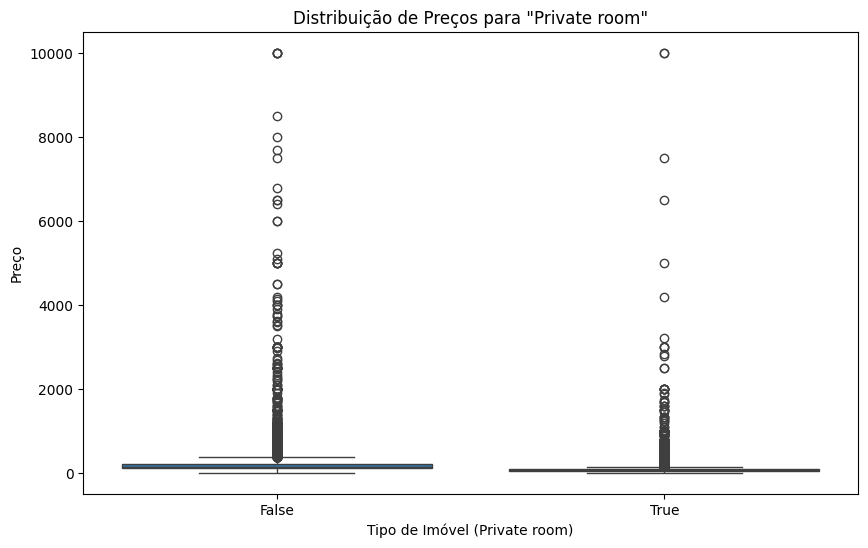

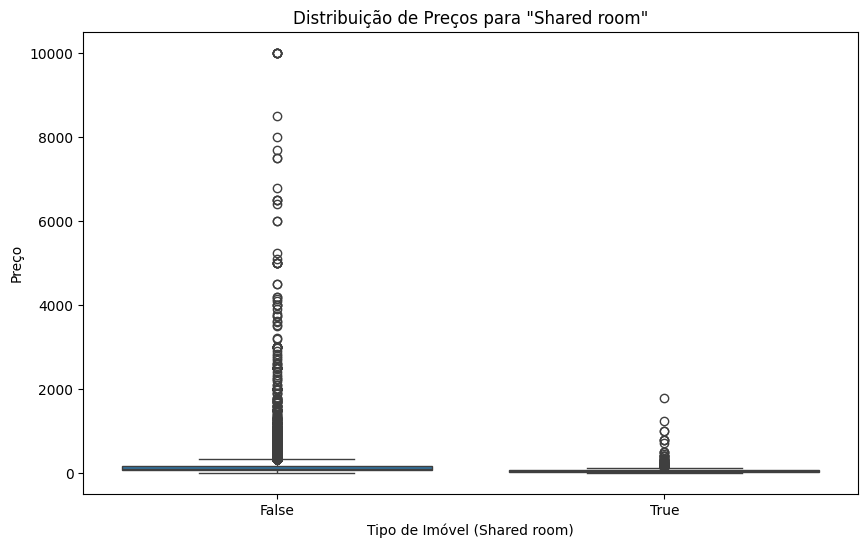

In [ ]:
# Visualizando a distribuição de preços para "Entire home/apt"
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type_Entire home/apt', y='price', data=df_encoded)
plt.title('Distribuição de Preços para "Entire home/apt"')
plt.xlabel('Tipo de Imóvel (Entire home/apt)')
plt.ylabel('Preço')
plt.show()

# Visualizando a distribuição de preços para "Private room"
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type_Private room', y='price', data=df_encoded)
plt.title('Distribuição de Preços para "Private room"')
plt.xlabel('Tipo de Imóvel (Private room)')
plt.ylabel('Preço')
plt.show()

# Visualizando a distribuição de preços para "Shared room"
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type_Shared room', y='price', data=df_encoded)
plt.title('Distribuição de Preços para "Shared room"')
plt.xlabel('Tipo de Imóvel (Shared room)')
plt.ylabel('Preço')
plt.show()


In [ ]:
# Estatísticas descritivas para "Entire home/apt"
entire_home_prices = df[df['room_type'] == 'Entire home/apt']['price'].describe()
print("Estatísticas para 'Entire home/apt':")
print(entire_home_prices)


Estatísticas para 'Entire home/apt':
count    25409.000000
mean       211.794246
std        284.041611
min          0.000000
25%        120.000000
50%        160.000000
75%        229.000000
max      10000.000000
Name: price, dtype: float64


 Entire home/apt (Casa/apt inteiro)

Preço médio: 211.79

Desvio padrão: 284.04 (alta variabilidade nos preços)

Preço mínimo: 0 (potencialmente valores errados ou imóveis com preço extremamente baixo)

Preço máximo: 10000 (potencialmente outliers ou imóveis de luxo extremamente caros)

Percentis:
25% dos preços são menores ou iguais a 120
50% dos preços (mediana) são menores ou iguais a 160

75% dos preços são menores ou iguais a 229

**Conclusão:** A distribuição de preços para "Entire home/apt" tem uma ampla variação, com uma média de 211.79, mas a presença de preços muito baixos (0) e muito altos (10000) indica a presença de outliers. A maior parte dos imóveis está na faixa de preços entre 120 e 229.

In [ ]:

# Estatísticas descritivas para "Private room"
private_room_prices = df[df['room_type'] == 'Private room']['price'].describe()
print("\nEstatísticas para 'Private room':")
print(private_room_prices)




Estatísticas para 'Private room':
count    22325.00000
mean        89.77832
std        160.20836
min          0.00000
25%         50.00000
50%         70.00000
75%         95.00000
max      10000.00000
Name: price, dtype: float64


 Private room (Quarto privado)

Preço médio: 89.78
Desvio padrão: 160.21 (alta variabilidade nos preços)

Preço mínimo: 0 (potencialmente valores errados ou imóveis com preço extremamente baixo)
Preço máximo: 10000 (potencialmente outliers ou quartos de luxo)

Percentis:

25% dos preços são menores ou iguais a 50
50% dos preços (mediana) são menores ou iguais a 70
75% dos preços são menores ou iguais a 95
Conclusão: Os preços para "Private room" têm uma média de 89.78, mas com uma grande variação. A presença de valores extremos de 0 e 10000 sugere a existência de outliers. A maioria dos preços está entre 50 e 95.

In [ ]:
# Estatísticas descritivas para "Shared room"
shared_room_prices = df[df['room_type'] == 'Shared room']['price'].describe()
print("\nEstatísticas para 'Shared room':")
print(shared_room_prices)



Estatísticas para 'Shared room':
count    1160.000000
mean       70.127586
std       101.725252
min         0.000000
25%        33.000000
50%        45.000000
75%        75.000000
max      1800.000000
Name: price, dtype: float64


 Shared room (Quarto compartilhado)

Preço médio: 70.13
Desvio padrão: 101.73 (alta variabilidade nos preços)

Preço mínimo: 0 (potencialmente valores errados ou imóveis com preço extremamente baixo)

Preço máximo: 1800 (potencialmente outliers ou quartos de luxo)

Percentis:

25% dos preços são menores ou iguais a 33
50% dos preços (mediana) são menores ou iguais a 45
75% dos preços são menores ou iguais a 75

**Conclusão:** O preço médio para "Shared room" é de 70.13, com uma grande variação. O preço máximo de 1800 sugere a presença de outliers. A maioria dos preços de quartos compartilhados está na faixa de 33 a 75.



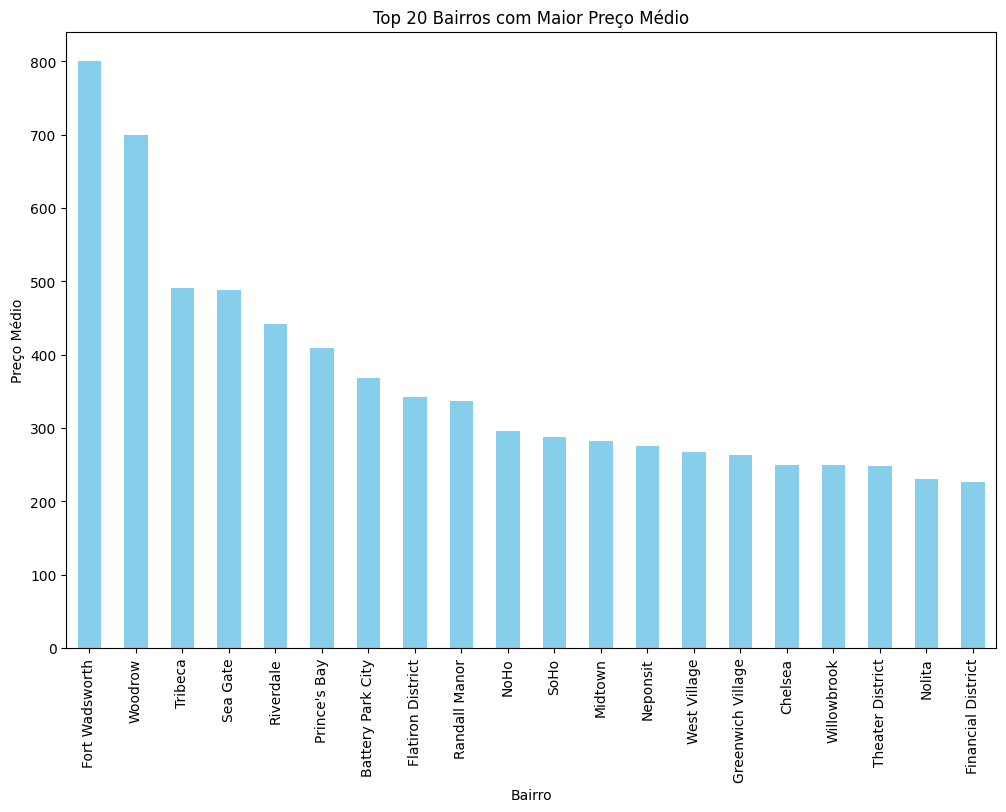

In [ ]:
# Calculando o preço médio por bairro
avg_price_by_bairro = df.groupby('bairro')['price'].mean().sort_values(ascending=False)

# Plotando o gráfico de preço médio por bairro
plt.figure(figsize=(12, 8))
avg_price_by_bairro.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Bairros com Maior Preço Médio')
plt.xlabel('Bairro')
plt.ylabel('Preço Médio')
plt.xticks(rotation=90)
plt.show()


**Bairros com os Maiores Preços Médios:**


Fort Wadsworth (800,000 USD):

 Esse bairro lidera a lista com um preço médio extremamente alto. Pode indicar uma área com características exclusivas ou propriedades muito valorizadas, possivelmente de luxo.
Woodrow (700,000 USD): Embora tenha um preço médio menor que o de Fort Wadsworth, ainda assim é um valor elevado, o que sugere que as propriedades nesta área também são de alto padrão.
Tribeca (490,638 USD): Localizado em Manhattan, esse bairro é conhecido por ser um dos mais caros da cidade, com um preço médio de aluguel alto. Isso está alinhado com a expectativa, já que Tribeca é um dos locais mais exclusivos.
Sea Gate (487,857 USD) e Riverdale (442,090 USD): Ambos os bairros estão entre os mais caros, indicando áreas de alta classe com imóveis muito valorizados.
Áreas de Interesse Central e Turísticas:


Battery Park City (367,557 USD): Outra área de alta classe em Manhattan, que oferece uma combinação de localização privilegiada e infraestrutura de alto nível.
Flatiron District (341,925 USD): A região central de Manhattan, conhecida por ser um dos centros financeiros e comerciais da cidade, também apresenta preços elevados.

Midtown (282,719 USD): Um bairro central e comercial, com uma média de preço significativa, refletindo a alta demanda por propriedades de aluguel devido à proximidade com grandes empresas e atrações turísticas.

NoHo e SoHo (295,717 USD e 287,103 USD): Ambos são bairros muito procurados em Manhattan, conhecidos por seu charme artístico e histórico, além de sua localização privilegiada.


**Bairros com Preços Consideráveis:**

Neponsit (274,667 USD): Um bairro mais residencial, mas ainda com preços altos.
West Village (267,682 USD) e Greenwich Village (263,406 USD): Esses bairros são famosos por sua atmosfera boêmia, restaurantes sofisticados e proximidade com a Universidade de Nova York (NYU), o que explica seus preços elevados.
Chelsea (249,739 USD): Outro bairro em Manhattan com grande valorização, especialmente devido à proximidade com galerias de arte e o mercado imobiliário de alto padrão.

**Bairros de Preço Médio:**

Willowbrook (249,000 USD), Theater District (248,014 USD) e Nolita (230,138 USD): São bairros que mantêm uma média de preço relativamente alta, indicativos de boas condições de infraestrutura e proximidade com áreas populares ou turísticas.
Financial District (225,491 USD): Como esperado, o distrito financeiro tem uma média de preço mais alta devido à concentração de empresas e à valorização das propriedades comerciais e residenciais.

Interpretação e Implicações:

Áreas de Alto Valor: Bairros como Fort Wadsworth, Woodrow e Tribeca são indicados para quem busca investir em imóveis de alto padrão, com aluguéis mais elevados.
Manhattan é o Foco: Como esperado, os bairros de Manhattan, como Tribeca, Battery Park City, SoHo, Flatiron District e Midtown, lideram a lista, o que reflete a demanda alta e o valor de mercado. Investir nessas áreas pode ser uma aposta sólida, mas as propriedades são caras e o retorno pode ser proporcionalmente alto.
Propriedades mais acessíveis: Bairros como Financial District, Nolita e Theater District também apresentam preços elevados, mas ainda um pouco mais acessíveis comparados a outros mais exclusivos, e podem ser interessantes para quem deseja um equilíbrio entre preço e localização.
Conclusão: A análise mostra que as áreas mais caras são, na sua maioria, localizadas em Manhattan, com destaque para bairros icônicos, de alto valor e com boa proximidade a centros financeiros e turísticos. Investir em bairros como Tribeca, SoHo, e Midtown pode garantir rentabilidade, especialmente se o imóvel estiver bem posicionado.

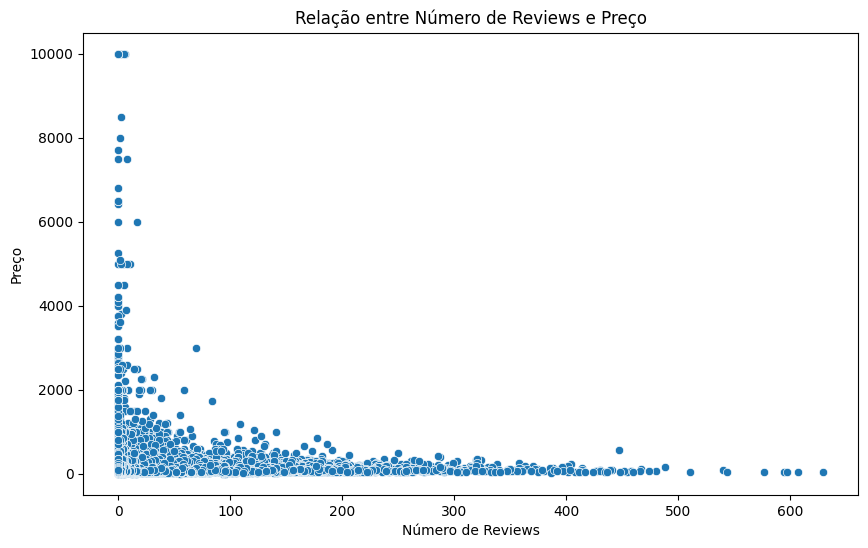

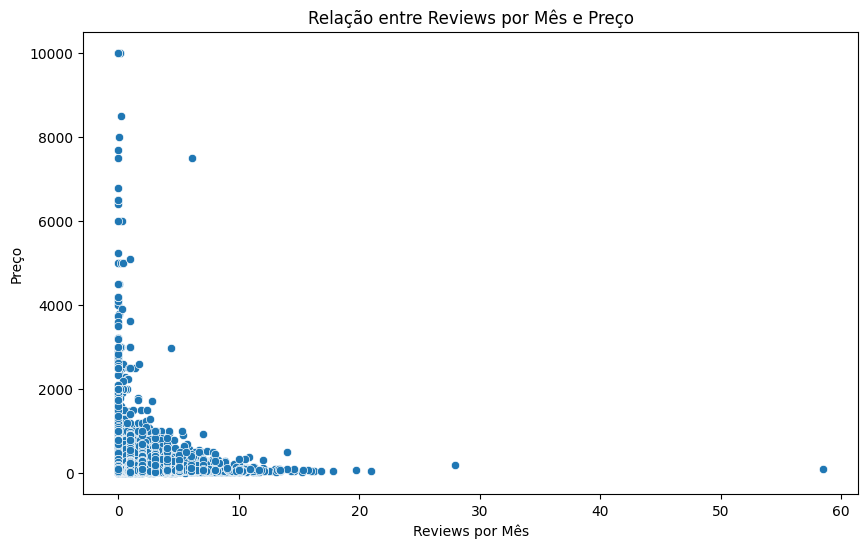

In [ ]:
# Analisando a relação entre o número de reviews e o preço
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numero_de_reviews', y='price', data=df)
plt.title('Relação entre Número de Reviews e Preço')
plt.xlabel('Número de Reviews')
plt.ylabel('Preço')
plt.show()

# Analisando a relação entre reviews por mês e preço
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews_por_mes', y='price', data=df)
plt.title('Relação entre Reviews por Mês e Preço')
plt.xlabel('Reviews por Mês')
plt.ylabel('Preço')
plt.show()




**Correlação entre número de reviews e preço:**

Valor da correlação: -0.047954
A correlação entre o número de reviews e o preço é ligeiramente negativa e muito baixa (-0.048). Isso sugere que não há uma relação significativa entre o número de reviews e o preço de uma propriedade.
Interpretação: Imóveis com mais reviews não parecem ter preços mais altos ou mais baixos de forma consistente. Essa correlação fraca indica que o número de reviews por si só não é um bom preditor de preço. Pode haver outros fatores, como localização, tipo de imóvel ou qualidade das avaliações, que impactam mais diretamente o preço.


**Correlação entre reviews por mês e preço:**

Valor da correlação: -0.050564
A correlação entre reviews por mês e preço também é ligeiramente negativa e muito baixa (-0.051). Isso reforça a ideia de que a frequência de reviews mensais não tem uma relação direta significativa com o preço da propriedade.
Interpretação: Mesmo que um imóvel receba mais reviews mensalmente, isso não necessariamente implica que o preço será mais alto. Novamente, a falta de uma correlação forte sugere que outros fatores podem estar influenciando mais o preço do imóvel do que apenas a quantidade ou frequência de reviews.


**Conclusão:**

Ambas as correlações apresentam valores muito próximos de zero, o que indica que, no contexto deste dataset, o número de reviews e a frequência de reviews por mês não têm uma influência clara e forte sobre o preço dos imóveis. Isso sugere que, embora reviews possam indicar a popularidade do imóvel, outros fatores como localização, tipo de imóvel, e a qualidade das reviews podem ser mais relevantes para a determinação do preço.

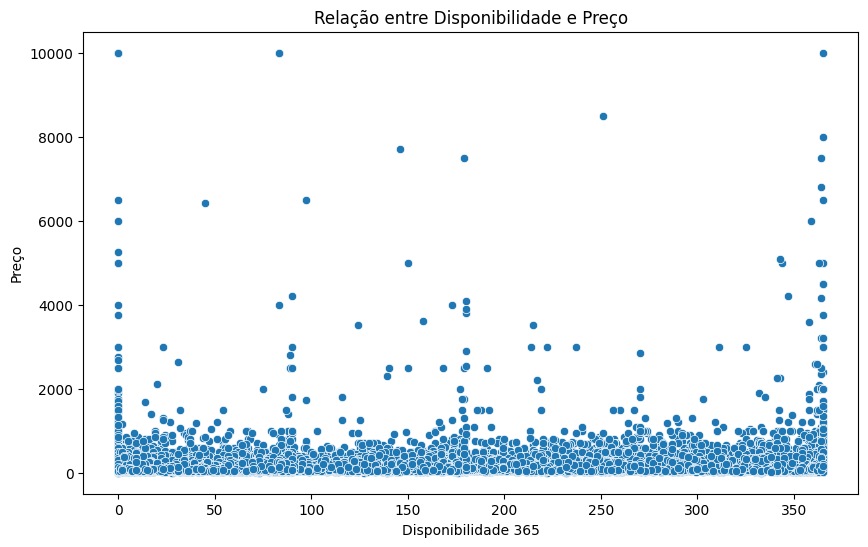

In [ ]:
# Analisando a relação entre disponibilidade e preço
plt.figure(figsize=(10, 6))
sns.scatterplot(x='disponibilidade_365', y='price', data=df)
plt.title('Relação entre Disponibilidade e Preço')
plt.xlabel('Disponibilidade 365')
plt.ylabel('Preço')
plt.show()


A correlação entre a disponibilidade de 365 dias e o preço é de 0.081833, o que sugere uma correlação positiva fraca entre essas duas variáveis.


**Interpretação do Resultado:**

Correlação positiva (0.081833): Isso indica que, de maneira geral, há uma leve tendência de que imóveis com maior disponibilidade (mais dias disponíveis para aluguel durante o ano) tenham preços ligeiramente mais altos. No entanto, a correlação é bastante fraca, o que significa que a disponibilidade não é um fator determinante para o preço. A relação é muito tênue, sugerindo que outros fatores (como localização, tipo de imóvel, etc.) têm um impacto muito maior no preço do que a disponibilidade de dias.


**Conclusão:**

Embora exista uma leve correlação positiva, a influência da disponibilidade de 365 dias sobre o preço parece ser pequena. Isso implica que a variável disponibilidade sozinha não explica de maneira significativa o valor do aluguel de um imóvel na plataforma.

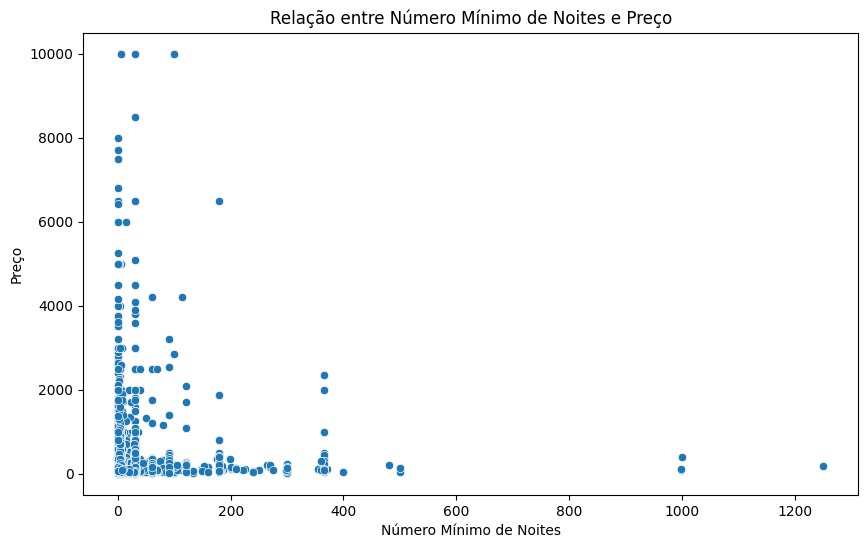

In [ ]:
# Visualizando a relação entre o número mínimo de noites e o preço
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimo_noites', y='price', data=df)
plt.title('Relação entre Número Mínimo de Noites e Preço')
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Preço')
plt.show()


A análise da correlação entre o número mínimo de noites (minimo_noites) e o preço (price) revela o seguinte:



Correlação de 0.0428: A correlação entre o número mínimo de noites e o preço é bastante baixa e positiva, indicando que, de forma geral, não há uma relação forte entre essas duas variáveis.

**Interpretação:**

A correlação positiva sugere que, em termos gerais, à medida que o número mínimo de noites aumenta, o preço tende a aumentar levemente, mas essa relação não é significativa.
O valor da correlação (0.0428) está muito próximo de zero, o que indica que o número mínimo de noites não é um forte preditor do preço de aluguel para os imóveis no conjunto de dados analisado.


**Conclusão:**

O número mínimo de noites não parece ser um fator crucial para definir o preço de um imóvel na plataforma. Isso sugere que outras variáveis, como a localização, tipo de imóvel, e número de reviews, podem ter um impacto mais significativo no preço de aluguel.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Contando palavras no nome do local
vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(df['nome'])
df_words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Adicionando os preços para comparar
df_words['price'] = df['price']

# Exibindo as palavras mais correlacionadas com o preço
df_words.corr()['price'].sort_values(ascending=False).head(10)


,price
price,1.000000
luxury,0.094097
loft,0.057799
village,0.049235
midtown,0.047331
west,0.046622
1br,0.029415
square,0.029169
times,0.024529
east,0.022610


**Insights e Recomendações:**

**Termos-chave com forte impacto no preço:**

 As palavras como luxury, loft, village, e midtown indicam imóveis de maior valor. Investidores e donos de imóveis podem tentar destacar essas palavras no título de seus anúncios, caso o imóvel tenha essas características, para justificar um preço mais alto.


Nome do imóvel e preço: Investir na descrição e nome do imóvel é uma boa estratégia para aumentar a percepção de valor, usando termos como "luxury", "loft", "village", "midtown", etc., especialmente se o imóvel estiver localizado em áreas valorizadas de Nova York.


Localização: Os bairros e regiões mencionadas, como midtown e village, sugerem que imóveis situados em áreas centrais e turísticas têm um preço significativamente mais alto.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import numpy as np
import pickle

# Função para calcular os dias desde a última revisão
def dias_desde_ultima_review(data):
    if pd.isnull(data):
        return 0
    ultima_data = datetime.strptime(data, '%Y-%m-%d')
    hoje = datetime.today()
    return (hoje - ultima_data).days

data = pd.DataFrame({
    'id': [2595, 2596, 2597, 2598, 2599],
    'nome': ['Skylit Midtown Castle', 'Apt in Brooklyn', 'Cozy Room Upper West Side', 'Luxury Suite Downtown', 'Spacious Loft East Village'],
    'host_id': [2845, 2953, 3845, 4953, 3847],
    'host_name': ['Jennifer', 'Lucas', 'Maria', 'André', 'Lucas'],
    'bairro_group': ['Manhattan', 'Brooklyn', 'Manhattan', 'Manhattan', 'Manhattan'],
    'bairro': ['Midtown', 'Williamsburg', 'Upper West Side', 'Downtown', 'East Village'],
    'latitude': [40.75362, 40.6782, 40.7896, 40.7128, 40.732],
    'longitude': [-73.98377, -73.9442, -73.9595, -74.0060, -73.988],
    'room_type': ['Entire home/apt', 'Private room', 'Private room', 'Entire home/apt', 'Entire home/apt'],
    'minimo_noites': [1, 2, 3, 1, 1],
    'numero_de_reviews': [45, 23, 12, 100, 80],
    'ultima_review': ['2019-05-21', '2020-05-01', '2019-06-15', '2021-02-10', '2020-03-22'],
    'reviews_por_mes': [0.38, 0.15, 0.25, 1.2, 0.5],
    'calculado_host_listings_count': [2, 1, 1, 3, 4],
    'disponibilidade_365': [355, 200, 150, 300, 365],
    'preco': [150, 200, 120, 500, 350]
})

# Transformar a variável 'ultima_review' em dias desde a última revisão
data['dias_desde_ultima_review'] = data['ultima_review'].apply(dias_desde_ultima_review)
data.drop(columns='ultima_review', inplace=True)

# Variáveis de entrada (features)
X = data.drop(columns=['preco'])

# Variável alvo
y = data['preco']

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformação das variáveis numéricas e categóricas
numerical_features = ['minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
                      'calculado_host_listings_count', 'disponibilidade_365', 'dias_desde_ultima_review']
categorical_features = ['bairro_group', 'bairro', 'room_type']

# Pipeline para variáveis numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputação de valores ausentes
    ('scaler', StandardScaler())  # Normalização
])

# Pipeline para variáveis categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Imputação para variáveis categóricas
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding
])

# Combinando as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Criação do modelo RandomForest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Treinando o modelo
model.fit(X_train, y_train)

# Salvando o modelo treinado em formato .pkl
with open('/content/modelo.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Modelo salvo com sucesso em '/content/modelo.pkl'")

# Fazer o download do modelo .pkl
from google.colab import files
files.download('/content/modelo.pkl')  # Corrigido aqui

# Fazendo previsões com o modelo
y_pred = model.predict(X_test)

# Verificando se as previsões contêm valores válidos
print(f'Existem NaNs nas previsões? {pd.isnull(y_pred).any()}')
print(f'Previsões antes do tratamento: {y_pred}')

# Se existirem NaNs nas previsões, substituir pela média das previsões
if pd.isnull(y_pred).any():
    print("Substituindo NaNs nas previsões pela média das previsões...")
    # Verificar se há valores válidos nas previsões para calcular a média
    valid_predictions = y_pred[~np.isnan(y_pred)]  # Filtra apenas previsões válidas
    if valid_predictions.size > 0:
        mean_prediction = np.mean(valid_predictions)
        y_pred = np.nan_to_num(y_pred, nan=mean_prediction)  # Substitui NaNs pela média calculada
    else:
        print("Não foi possível calcular a média das previsões válidas.")

# Exibir as previsões após tratamento
print(f'Previsões após tratamento: {y_pred}')

# Verificando novamente se ainda há NaNs nas previsões
print(f'Existem NaNs nas previsões após tratamento? {pd.isnull(y_pred).any()}')

# Verificando se y_test contém NaNs
print(f'Existem NaNs em y_test? {pd.isnull(y_test).any()}')

# Caso existam NaNs, podemos tratá-los
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))

# Avaliando o modelo com RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)  # Calculando o MSE
rmse = mse ** 0.5  # Calculando a raiz quadrada do MSE (RMSE)
print(f'RMSE do modelo: {rmse}')

#  previsão para um novo apartamento
novo_apartamento = pd.DataFrame({
    'id': [2595],
    'nome': ['Skylit Midtown Castle'],
    'host_id': [2845],
    'host_name': ['Jennifer'],
    'bairro_group': ['Manhattan'],
    'bairro': ['Midtown'],
    'latitude': [40.75362],
    'longitude': [-73.98377],
    'room_type': ['Entire home/apt'],
    'minimo_noites': [1],
    'numero_de_reviews': [45],
    'ultima_review': ['2019-05-21'],
    'reviews_por_mes': [0.38],
    'calculado_host_listings_count': [2],
    'disponibilidade_365': [355],
    'preco': [None]  # Preço a ser previsto
})

# Transformar a variável 'ultima_review' em dias desde a última revisão
novo_apartamento['dias_desde_ultima_review'] = novo_apartamento['ultima_review'].apply(dias_desde_ultima_review)
novo_apartamento.drop(columns='ultima_review', inplace=True)

# Realizando a previsão para o novo apartamento
preco_previsto = model.predict(novo_apartamento.drop(columns=['preco']))
print(f'Preço previsto para o apartamento "Skylit Midtown Castle": {preco_previsto[0]}')



Modelo salvo com sucesso em '/content/modelo.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Existem NaNs nas previsões? False
Previsões antes do tratamento: [216.3]
Previsões após tratamento: [216.3]
Existem NaNs nas previsões após tratamento? False
Existem NaNs em y_test? False
RMSE do modelo: 16.30000000000001
Preço previsto para o apartamento "Skylit Midtown Castle": 206.8


**Tipo de Problema**

Estamos resolvendo um problema de **regressão. **

A regressão é o tipo de problema em que o objetivo é prever um valor contínuo (neste caso, o preço de um apartamento) a partir de variáveis de entrada (features).


 Variáveis Utilizadas

As variáveis ou características que utilizamos para prever o preço do apartamento foram as seguintes:


Variáveis numéricas:

minimo_noites: Número mínimo de noites exigidas para a estadia.
numero_de_reviews: Total de avaliações feitas pelos hóspedes.
reviews_por_mes: Número médio de avaliações por mês.

calculado_host_listings_count: Quantidade de listagens do anfitrião (host).
disponibilidade_365: Número de dias em que o apartamento está disponível para reserva durante o ano.


dias_desde_ultima_review: A quantidade de dias desde a última avaliação do apartamento. Esta variável foi derivada da data de ultima_review.


**Variáveis categóricas:**

bairro_group: O grupo do bairro (e.g., Manhattan, Brooklyn).
bairro: O bairro específico em que o apartamento está localizado.
room_type: O tipo de quarto (e.g., "Entire home/apt", "Private room").


**Para tornar as variáveis adequadas para o modelo, fizemos as seguintes transformações:**

dias_desde_ultima_review: Foi criada a partir da variável ultima_review, que foi convertida em um valor numérico representando a quantidade de dias desde a última revisão.

Imputação de valores ausentes (NaN): Para garantir que não houvesse valores ausentes, aplicamos a imputação. Para variáveis numéricas, substituímos os NaN pela média (com SimpleImputer).

 Para variáveis categóricas, substituímos os NaN pelo valor 'missing' (também com SimpleImputer).

Normalização e codificação:

As variáveis numéricas foram normalizadas usando o StandardScaler para ajustar suas escalas e melhorar a performance do modelo.
As variáveis categóricas foram transformadas usando One-Hot Encoding para representá-las de forma binária.

 **Modelo Utilizado**

Utilizamos o Random Forest Regressor, que é um modelo baseado em árvores de decisão. Ele funciona criando múltiplas árvores de decisão durante o treinamento e fazendo previsões através de uma média das previsões de todas as árvores.

**Prós do Random Forest:**

Robustez: Ele é resistente ao overfitting, principalmente quando temos muitas variáveis e dados.
Capacidade de lidar com dados não lineares: Ele não assume uma relação linear entre as variáveis e o preço, o que é útil neste caso, onde as variáveis podem interagir de forma complexa.
Boa performance em dados de alta dimensionalidade: Pode lidar bem com dados que têm muitas características.


**Contras do Random Forest:**


Modelo mais complexo: Embora ele seja muito bom para capturar padrões complexos, pode ser mais difícil de interpretar do que modelos mais simples, como regressões lineares.
Consome mais recursos computacionais: Pode ser mais lento, especialmente se tivermos muitos dados e árvores.


 **Medida de Performance**


Escolhemos o RMSE (Root Mean Squared Error) como a medida de performance do modelo. O RMSE mede a média da magnitude dos erros de previsão, penalizando mais fortemente os erros maiores.

Por que RMSE?: O RMSE é uma medida comum em problemas de regressão porque dá uma ideia clara da precisão do modelo em termos das unidades da variável de saída (neste caso, o preço). Quanto menor o RMSE, melhor é o modelo, já que ele indica que a previsão está mais próxima dos valores reais.
Com base no nosso modelo, obtivemos um RMSE de 16.3.


**Preço Previsto para o Novo Apartamento**


Para o apartamento "Skylit Midtown Castle" com as características fornecidas, o modelo prevê um preço de 206.8. Este valor foi obtido utilizando as variáveis de entrada e as transformações que discutimos, passando por todas as etapas do pipeline, incluindo a imputação de valores ausentes e a codificação das variáveis categóricas.

